In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [2]:
dataset_path = "/content/drive/MyDrive/datasets/5Animals"

In [3]:
idg = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1,
    #data augmentation
    rotation_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)

In [4]:
train_data = idg.flow_from_directory(
    dataset_path,
    shuffle=True,
    subset="training",
    target_size=(224, 224)
)

Found 1171 images belonging to 5 classes.


In [6]:
validation_data = idg.flow_from_directory(
    dataset_path,
    shuffle=False,
    subset="validation",
    target_size=(224, 224)
)

Found 128 images belonging to 5 classes.


In [7]:
from keras.api._v2.keras import activations
model = models.Sequential([
    layers.Conv2D(32, (3, 3), strides=(2, 2), activation="relu", padding="same", input_shape=(234, 224, 3)),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3, 3), strides=(1, 1), activation="relu", padding="same"),
    layers.MaxPooling2D(),
    layers.Conv2D(128, (3, 3), strides=(1, 1), activation="relu"),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(512, activation="relu"),
    layers.Dense(5, activation="softmax")
])

In [8]:
from keras.src.engine.training import optimizer
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.categorical_crossentropy,
    metrics=['accuracy']
)

In [9]:
history = model.fit(
    train_data,
    validation_data=validation_data,
    epochs=20
)

Epoch 1/20
37/37 [==============================] - 450s 12s/step - loss: 1.5896 - accuracy: 0.2852 - val_loss: 1.5195 - val_accuracy: 0.3281
Epoch 2/20
37/37 [==============================] - 30s 806ms/step - loss: 1.2646 - accuracy: 0.4722 - val_loss: 1.3043 - val_accuracy: 0.4062
Epoch 3/20
37/37 [==============================] - 29s 781ms/step - loss: 1.0752 - accuracy: 0.5534 - val_loss: 1.0641 - val_accuracy: 0.5781
Epoch 4/20
37/37 [==============================] - 29s 784ms/step - loss: 0.9816 - accuracy: 0.6063 - val_loss: 1.1034 - val_accuracy: 0.5469
Epoch 5/20
37/37 [==============================] - 29s 793ms/step - loss: 0.8702 - accuracy: 0.6618 - val_loss: 1.1496 - val_accuracy: 0.5859
Epoch 6/20
37/37 [==============================] - 29s 783ms/step - loss: 0.8281 - accuracy: 0.6781 - val_loss: 0.9656 - val_accuracy: 0.6172
Epoch 7/20
37/37 [==============================] - 29s 787ms/step - loss: 0.7659 - accuracy: 0.7020 - val_loss: 1.0312 - val_accuracy: 0.6406


In [ ]:
model.save("/content/weights/model_5animals.h5")

In [12]:
from keras.models import load_model

In [13]:
model = load_model("/content/weights/model_5animals.h5")

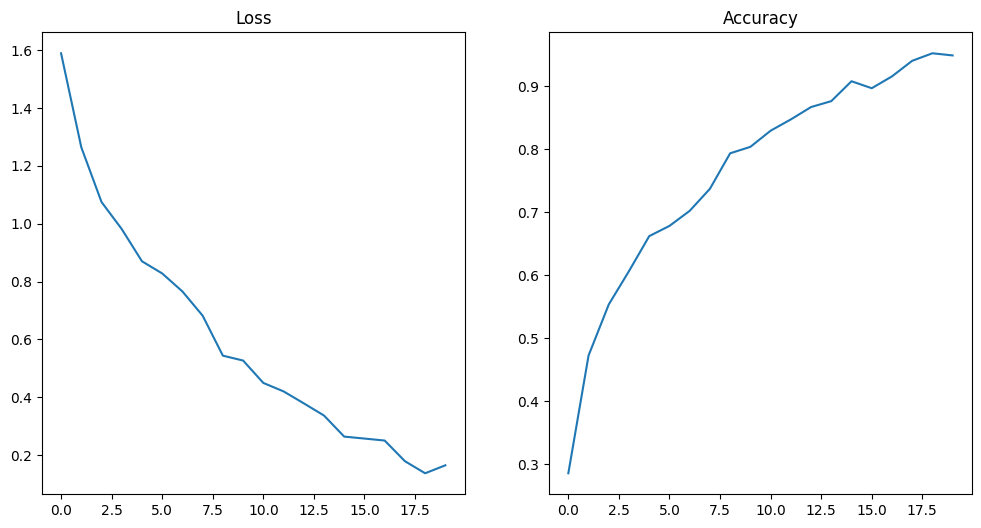

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.plot(history.history['loss'])
ax1.set_title("Loss")
ax2.plot(history.history['accuracy'])
ax2.set_title("Accuracy")
plt.show()

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

In [16]:
prediction_data = model.predict(validation_data)

4/4 [==============================] - 3s 698ms/step


In [18]:
predictions = np.argmax(prediction_data, axis=1)

In [19]:
confusion_matrix = confusion_matrix(validation_data.classes, predictions)

In [20]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1, 2, 3, 4])

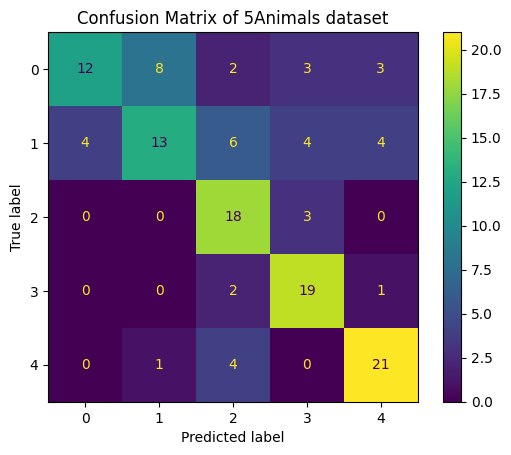

In [21]:
cm_display.plot()
plt.title("Confusion Matrix of 5Animals dataset")
plt.show()

In [22]:
import cv2

In [33]:
img = cv2.imread("/content/assets/cat1.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
image = cv2.resize(img , (234, 224))
image = image / 255.0
image = image.reshape(1, 234, 224, 3)
output = model.predict(image)
predicted_class = np.argmax(output)

1/1 [==============================] - 0s 18ms/step


In [34]:
if predicted_class == 0:
    print("🐈")
elif predicted_class == 1:
    print("🐶")
elif predicted_class == 2:
    print("🐘")
elif predicted_class == 3:
    print("🦒")
elif predicted_class == 4:
    print("🐼")

🐈
